# Final Project
## Neural network: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# LSTM
import tensorflow as tf
import keras
from tensorflow.keras import layers
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index",'is_holiday','is_weekend'], axis = 1)
dataset = dataset.dropna(axis=0, how='any')
dataset

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-01,17,39,2,-22.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.197574,51.4996
2016-04-01,42,24,3,18.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.084606,51.5213
2016-04-01,51,30,4,21.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.120974,51.5301
2016-04-01,44,71,5,-27.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.156876,51.4931
2016-04-01,48,38,6,10.0,8.520833,7.895833,66.5000,11.166667,1.0,-0.144229,51.5181
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,1,109,167,-108.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.147624,51.4940
2016-06-30,3,17,168,-14.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.195456,51.5004
2016-06-30,1,30,169,-29.0,17.250000,17.250000,74.0625,18.416667,30.0,-0.165164,51.5147


In [4]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [5]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

### Datasets for each stations

In [6]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [7]:
obj.get_group(1)

,In,Out,Station Id,Total,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,longitude,latitude
timestamp,,,,,,,,,,,
2016-04-02,13,22,1,-9.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292
2016-04-03,27,22,1,5.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292
2016-04-04,52,20,1,32.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292
2016-04-05,75,12,1,63.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292
2016-04-06,41,23,1,18.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292
...,...,...,...,...,...,...,...,...,...,...,...
2016-06-25,11,9,1,2.0,16.062500,16.062500,73.458333,13.562500,25.0,-0.109971,51.5292
2016-06-26,48,26,1,22.0,16.604167,16.604167,71.145833,19.270833,26.0,-0.109971,51.5292
2016-06-27,23,22,1,1.0,18.062500,18.062500,68.958333,16.041667,27.0,-0.109971,51.5292


In [8]:
# add datasets to list

df = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df.append(obj.get_group(i))

## Neural network

2022-04-12 00:21:08.376738: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
4/4 [==============================] - 1s 3ms/step - loss: 0.9730 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9722 - accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9721 - accuracy: 0.0000e+00
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9720 - accuracy: 0.0000e+00
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9719 - accuracy: 0.0000e+00
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9716 - accuracy: 0.0000e+00
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.9715 - accuracy: 0.0000e+00

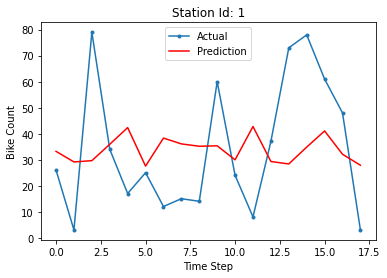

MAE: 22.369088702731663
MSE: 691.4243304823701
RMSE: 26.294948763638427
RMAE: 4.729597097293983


In [9]:
#X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
#y = df[i]['In'].values # Predict
    
X = df[1].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
y = df[1].values[:, 0:1] # 'In'
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### create ANN model ###

neural_network_model = keras.Sequential([
# Defining the Input layer and FIRST hidden layer, both are same!
layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
layers.Dense(1, kernel_initializer='normal'),
])


# Fitting the ANN to the Training set
neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
neural_network_model.fit(X_train, y_train, epochs = 50, batch_size = 20)

# Generating Predictions on testing data
pred = neural_network_model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
y_pred = TargetVarScalerFit.inverse_transform(pred)
 
# Scaling the y_test Price data back to original price scale
y_test_org = TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
## Print heading
plt.title( 'Station Id: %d' % (1))
    
## Plotting in a graph form
plt.plot(y_test_org, marker='.', label="Actual")
plt.plot(y_pred, color='red', label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## Calculate error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_org, y_pred))
print('MSE:', metrics.mean_squared_error(y_test_org, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_org, y_pred)))
print('RMAE:', np.sqrt(metrics.mean_absolute_error(y_test_org, y_pred)))
    

In [10]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'batch_size', 'epochs', 'Accuracy'])
    
    # initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            test_model = keras.Sequential([
            layers.Dense(units = 5, input_dim = X_train.shape[1], kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(units =5 , kernel_initializer = 'normal', activation = 'relu'),
            layers.Dense(1, kernel_initializer = 'normal'),
            ])

            # Compiling the model
            test_model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            test_model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test - test_model.predict(X_test)) / y_test))
            
            # printing the results of the current iteration
            #print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(data = [[TrialNumber, batch_size_trial, epochs_trial, 100-MAPE]],
                                                                      columns = ['TrialNumber', 'batch_size', 'epochs', 'Accuracy'] ))
    return SearchResultsData

In [11]:
result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
result_df

,TrialNumber,batch_size,epochs,Accuracy
0,1,5,5,110.059115
0,2,5,10,107.448458
0,3,5,50,94.569714
0,4,5,100,95.144267
0,5,10,5,110.470585
0,6,10,10,109.186101
0,7,10,50,107.070156
0,8,10,100,99.699076
0,9,15,5,110.641773
0,10,15,10,110.255897


<AxesSubplot:xlabel='batch_size'>

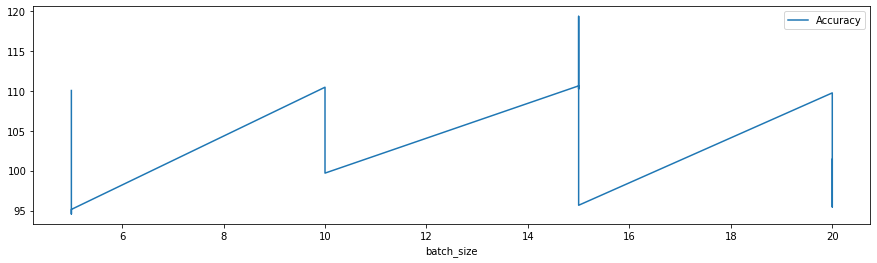

In [12]:
%matplotlib inline
result_df.plot(x='batch_size', y='Accuracy', figsize=(15,4), kind='line')

# parameters 
# e.g. 15-50
# 15 - batch size, 50 - epochs

In [13]:
return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
print(return_df['batch_size'][0], return_df['epochs'][0])

15 50


Epoch 1/50
5/5 [==============================] - 1s 1ms/step - loss: 0.9728 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9723 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9721 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9720 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9719 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9716 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9712 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9708 - accuracy: 0.0000e+00
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9705 - accuracy: 0.0000e+00

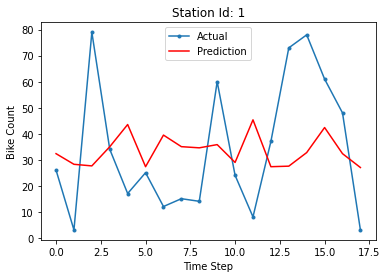

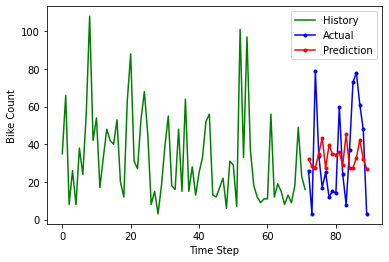

MAE: 22.55535337660048
MSE: 721.5546447446844
RMSE: 26.861769203548086
RMAE: 4.749247664272782
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1723 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1720 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1720 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1719 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1718 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1715 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1713 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1712 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1708 - accuracy: 0.0000e+00
Epoch

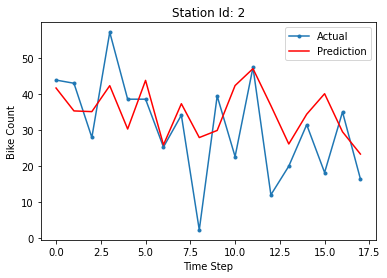

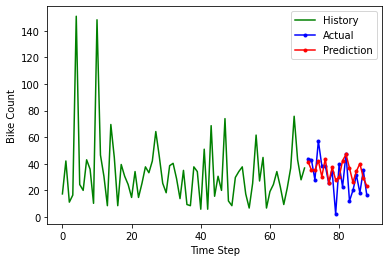

MAE: 9.574595624675787
MSE: 154.9203196849341
RMSE: 12.446699148165111
RMAE: 3.094284347741136
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.7639 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7633 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7627 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7620 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7616 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7611 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7608 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7603 - accuracy: 0.0000e+00
Epoch

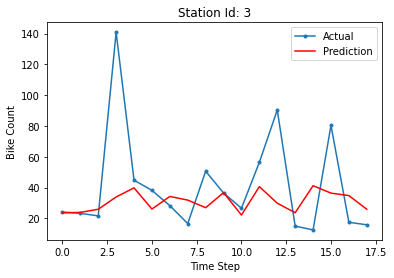

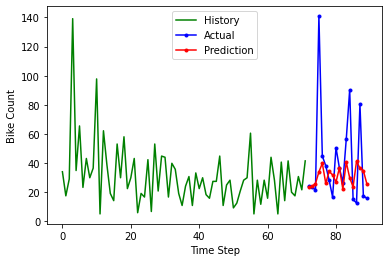

MAE: 20.22115514742704
MSE: 1089.6773934075138
RMSE: 33.01026194091034
RMAE: 4.496793874242741
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1015 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1009 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1008 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1005 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1003 - accuracy: 0.0000e+00
Epoch

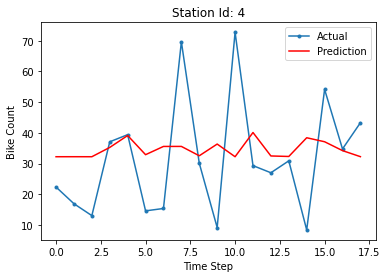

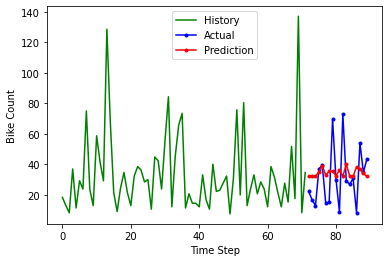

MAE: 14.762096032405104
MSE: 359.25943504062417
RMSE: 18.954140313942602
RMAE: 3.842147320497368
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0978 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 1.0975 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0974 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0975 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0971 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0969 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0964 - accuracy: 0.0000e+00
Epo

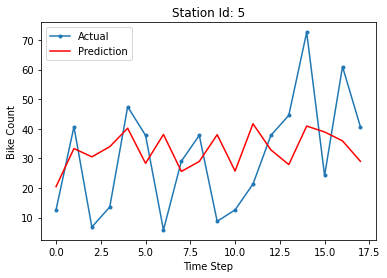

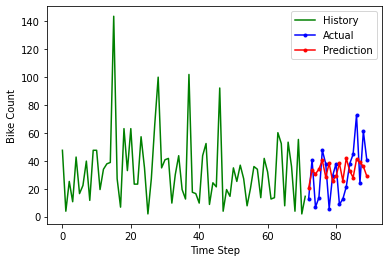

MAE: 16.005794090737705
MSE: 339.0488444820387
RMSE: 18.41327902580197
RMAE: 4.0007241957847715
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1972 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1964 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 1.1962 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1960 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1959 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1956 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1953 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1950 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1944 - accuracy: 0.0000e+00
Epoc

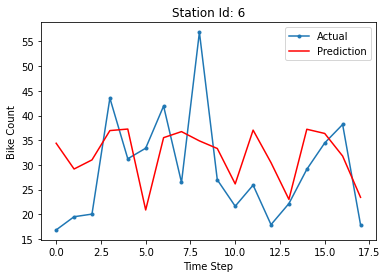

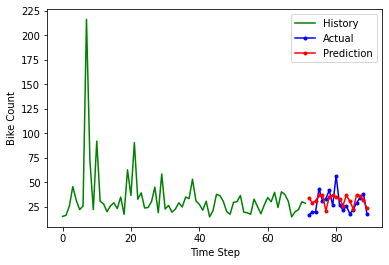

MAE: 8.851660532013401
MSE: 104.02489347094976
RMSE: 10.199259456987539
RMAE: 2.9751740339034622
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0099 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0098 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0098 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0096 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0096 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.0095 - accuracy: 0.0000e+00
Epo

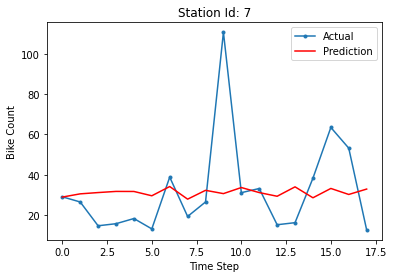

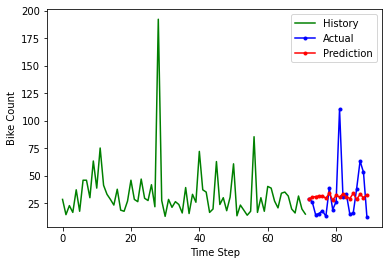

MAE: 15.849621347656283
MSE: 555.9788354694275
RMSE: 23.579203452818916
RMAE: 3.981158292212994
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.0000e+00
Epoc

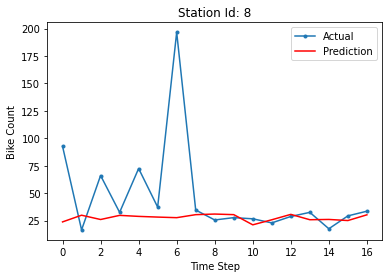

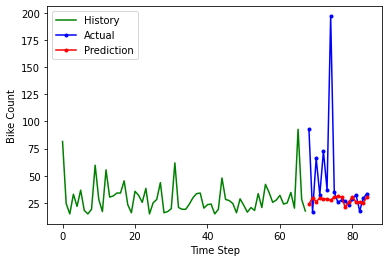

MAE: 23.076597785121045
MSE: 2197.5197342684723
RMSE: 46.877710420502325
RMAE: 4.80381075658909
Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1043 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1040 - accuracy: 0.0000e+00
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1039 - accuracy: 0.0000e+00
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1039 - accuracy: 0.0000e+00
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1039 - accuracy: 0.0000e+00
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1037 - accuracy: 0.0000e+00
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1036 - accuracy: 0.0000e+00
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1034 - accuracy: 0.0000e+00
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 1.1033 - accuracy: 0.0000e+00
Epoc

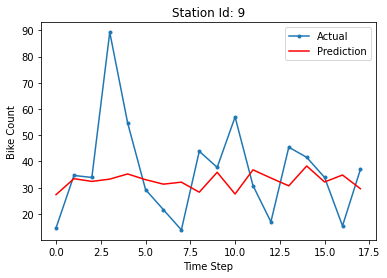

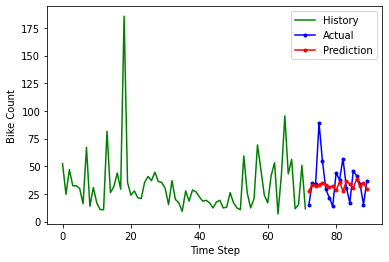

MAE: 13.264075922004261
MSE: 345.0294231516743
RMSE: 18.574967648738294
RMAE: 3.641987907998084

Error Calculation
Average MAE: 14.41609498586411
Average MSE: 586.7013523720319
Average RMSE: 20.89172906114152
Average RMAE: 3.5585328393242426


In [21]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler

    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    
    # find best parameters
    result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
    return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
    best_batch_size = int(return_df['batch_size'][0])
    best_epochs = int(return_df['epochs'][0])
    
    neural_network_model.fit(X_train, y_train, batch_size = best_batch_size,  epochs = best_epochs)
    #neural_network_model.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = neural_network_model.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    ## Print heading
    plt.title( 'Station Id: %d' % (i))

    plt.plot(np.arange(0, len(y_train)), y_train, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_org, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

    
    ## Calculate error
    from sklearn import metrics
    MAE = metrics.mean_absolute_error(y_test_org, y_pred)
    MSE = metrics.mean_squared_error(y_test_org, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_org, y_pred))
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_org, y_pred))
    
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print('RMAE:', RMAE)
    totalMAE += MAE
    totalMSE += MSE
    totalRMAE += RMSE
    totalRMSE += RMAE

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)
    

## K fold

In [22]:
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10
for i in range(1, no_station):
    
    X = df[i].values[:, 6:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df[i].values[:, 0:1] # 'In'
 
    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler

    PredictorScaler = StandardScaler()
    TargetVarScaler = StandardScaler()

    # Generating the standardized values of X and y
    X = PredictorScaler.fit(X).transform(X)
    y = TargetVarScaler.fit(y).transform(y)
 
    # Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # K fold
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import KFold
    from sklearn.feature_selection import RFE
    
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)                                           
    
    # step-2: specify range of hyperparameters to tune
    # range (1,6) : 'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    hyper_params = [{'n_features_to_select': list(range(1, 6))}]              

    ### create ANN model ###

    neural_network_model = keras.Sequential([
    layers.Dense(units=5, input_dim=5, kernel_initializer='normal', activation='relu'),
    layers.Dense(units=5, kernel_initializer='normal', activation='tanh'),
    layers.Dense(1, kernel_initializer='normal'),
    ])

    # Fitting the ANN to the Training set
    neural_network_model.compile(optimizer ='adam', loss ='mean_squared_error', metrics = ['accuracy'])
    rfe = RFE(neural_network_model)       
    
    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

    
    # find best parameters
    #result_df = FunctionFindBestParams(X_train, y_train, X_test, y_test)
    #return_df = result_df.loc[result_df['Accuracy'] == result_df['Accuracy'].max()]
    #best_batch_size = int(return_df['batch_size'][0])
    #best_epochs = int(return_df['epochs'][0])
    
    #model_cv.fit(X_train, y_train, batch_size = best_batch_size,  epochs = best_epochs)
    model_cv.fit(X_train, y_train, batch_size = 15,  epochs = 50)

    pred = model_cv.predict(X_test)
    y_pred = TargetVarScalerFit.inverse_transform(pred)
 
    y_test_org = TargetVarScalerFit.inverse_transform(y_test)
    Test_Data = PredictorScalerFit.inverse_transform(X_test)
 
    ## Print heading
    plt.title( 'Station Id: %d' % (i))
    
    plt.plot(np.arange(0, len(y_train)), y_test_org, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_org, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

    ## Calculate error
    from sklearn import metrics
    MAE = metrics.mean_absolute_error(y_test_org, y_pred)
    MSE = metrics.mean_squared_error(y_test_org, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test_org, y_pred))
    RMAE = np.sqrt(metrics.mean_absolute_error(y_test_org, y_pred))
    
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print('RMAE:', RMAE)
    totalMAE += MAE
    totalMSE += MSE
    totalRMAE += RMSE
    totalRMSE += RMAE

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
print('Average RMSE:', totalRMAE / no_station)
print('Average RMAE:', totalRMSE / no_station)

2022-04-12 00:32:32.008606: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://90c7fef3-6c5a-4727-bef8-04399ae35abb/assets
Fitting 5 folds for each of 5 candidates, totalling 25 fits
INFO:tensorflow:Assets written to: ram://d72a1587-d605-4d8c-b844-33d3a2a6c8b3/assets
INFO:tensorflow:Assets written to: ram://451e58eb-b1c0-4de2-af28-00bb787985c0/assets
INFO:tensorflow:Assets written to: ram://de29e4cc-a9af-4120-83e9-cf4b7ae9adb5/assets
INFO:tensorflow:Assets written to: ram://3f597d2d-5e97-4d25-aba0-0bbd252e202d/assets
INFO:tensorflow:Assets written to: ram://205a4dbf-6ad5-417e-89e7-04c57aca7326/assets
INFO:tensorflow:Assets written to: ram://5639b05f-b4d2-4e39-abaf-7485e70bb436/assets
INFO:tensorflow:Assets written to: ram://bdecacce-8cdb-4db4-afc7-14e61fd04390/assets
INFO:tensorflow:Assets written to: ram://e66239c3-573e-4e45-9175-60f6d5769b63/assets
INFO:tensorflow:Assets written to: ram://001fab54-aae7-489d-87ce-7661b0dda183/assets
INFO:tensorflow:Assets written to: ram://2e95e150-551c-417b-8907-aa81449aba8f/assets
INFO:

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py", line 222, in fit
    return self._fit(X, y, **fit_params)
  File "/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/feature_selection/_

INFO:tensorflow:Assets written to: ram://bd97c5bf-2f68-4326-9b31-8f818d13ea00/assets
INFO:tensorflow:Assets written to: ram://6ad6637a-aa1f-4108-825c-6fa3a64a55ab/assets


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x7f8fadf73100>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/